## Shipt Data Analyst Take Home Assessment 

Genesis L. Taylor<br>
[Linkedin](https://linkedin.com/in/genesistaylor/) | [Tableau](https://public.tableau.com/profile/genesis.taylor#!/) | [genesisltaylor@gmail.com](mailto:genesisltaylor@gmail.com) | [Github](https://github.com/GenTaylor/) | 

#### Directions:

Complete and return to me within 48 hours. Please do questions 1, 2, 3, skip, 4, 5, 6 (for extra points you can complete these). When you get to additional questions, pick one of the two questions. If there are any issues, please let me know. Please return in these formats: PDF or HTML

#### Modules and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##### Questions 1, 2, and 3 deal with “InterviewData_Cost.csv” and “InterviewData_Rev.csv”.

In [2]:
#Cost and Revenue Datasets
costdf = pd.read_csv("InterviewData_Cost.csv")
revdf = pd.read_csv("InterviewData_Rev.csv")

In [3]:
#columns
print("Cost's Columns:",costdf.columns)
print("Revenue's Columns:",revdf.columns)

print("\n")

#dataframe shapes
print("Cost Shape:",costdf.shape)
print("Revenue Shape:", revdf.shape)

Cost's Columns: Index(['date', 'source_id', 'cost'], dtype='object')
Revenue's Columns: Index(['date', 'source_id', 'revenue'], dtype='object')


Cost Shape: (10000, 3)
Revenue Shape: (10000, 3)


#### Question 1:
Using any functions/packages you want, join these two data sets by “date” and “source_id”, returning
all rows from both regardless of whether there is a match between the two data sets.

In [4]:
#merge dataframes on 'date' and 'source_id' columns.
cost_rev = pd.merge (costdf, revdf,  on = ["date", "source_id"], how = "outer")

cost_rev.head()

,date,source_id,cost,revenue
0,10/17/14,PA0577,7168.0,8417.0
1,8/17/14,PA0354,7615.0,4200.0
2,1/7/14,PA0607,4054.0,7935.0
3,8/25/14,PA0745,9317.0,5536.0
4,11/30/14,PA0923,5586.0,NaN


#### Question 2:
Using any functions/packages you want, join these two data sets by “date” and “source_id”, returning
only the rows from the “Cost” file that have no corresponding date in the “Revenue” file.

In [5]:
'''
Taking the previously joined datasets that were formed into a dataframe and using that dataframe 
to find the rows where "cost" has no corresponding date for "revenue"
'''

no_rev = cost_rev[(pd.notnull(cost_rev["cost"]) & pd.isnull(cost_rev["revenue"]))]

print('Cost dates that have no corresponding revenue dates:',no_rev.shape[0])

Cost dates that have no corresponding revenue dates: 4609


##### There are 4,609 rows where cost dates have no corresponding revenue dates. 

#### Question 3:
Using your result from #1, what are the Top 4 sources (“source_id” values) in terms of total revenue
generation across this data set? How would you visualize the monthly revenue for those Top 4 sources?
(note: you don’t need to actually create a plot; you can just describe what your ideal visual would look
like)

In [6]:
'''
In order to get the top 4 sources I am going to group the values by source and revenue,
get the sum of those values, sort them in ascending order, then recall the 1st 4 rows.
'''
top_4_sources = cost_rev.groupby(["source_id"]).sum().sort_values("revenue", ascending=False).head(4)

#top 4 sources
top_4_sources

,cost,revenue
source_id,,
PA0527,1023620.0,1385747.0
PA0308,894082.0,1338615.0
PA0352,974021.0,1309685.0
PA0552,868176.0,1283190.0


In [7]:
'''
Create a month column from the date column in the cost_rev dataframe.
'''
cost_rev['date'] = pd.to_datetime(cost_rev['date'])
cost_rev['month'] = cost_rev.date.dt.strftime('%m')


In [8]:
top4rev = cost_rev[(cost_rev['source_id'].isin(['PA0527','PA0308','PA0352','PA0552']))]
top4rev

,date,source_id,cost,revenue,month
16,2014-03-29,PA0552,7894.0,NaN,03
22,2014-08-21,PA0552,4653.0,NaN,08
27,2014-04-28,PA0308,3958.0,10863.0,04
65,2014-12-20,PA0552,2092.0,NaN,12
76,2014-08-13,PA0308,777.0,3863.0,08
...,...,...,...,...,...
14543,2014-07-26,PA0308,NaN,1262.0,07
14545,2014-07-02,PA0308,NaN,3582.0,07
14558,2014-10-14,PA0308,NaN,10001.0,10
14580,2014-07-05,PA0308,NaN,11646.0,07


In [9]:
top4rev.to_csv(r'top4rev.csv', index = False, header=True)

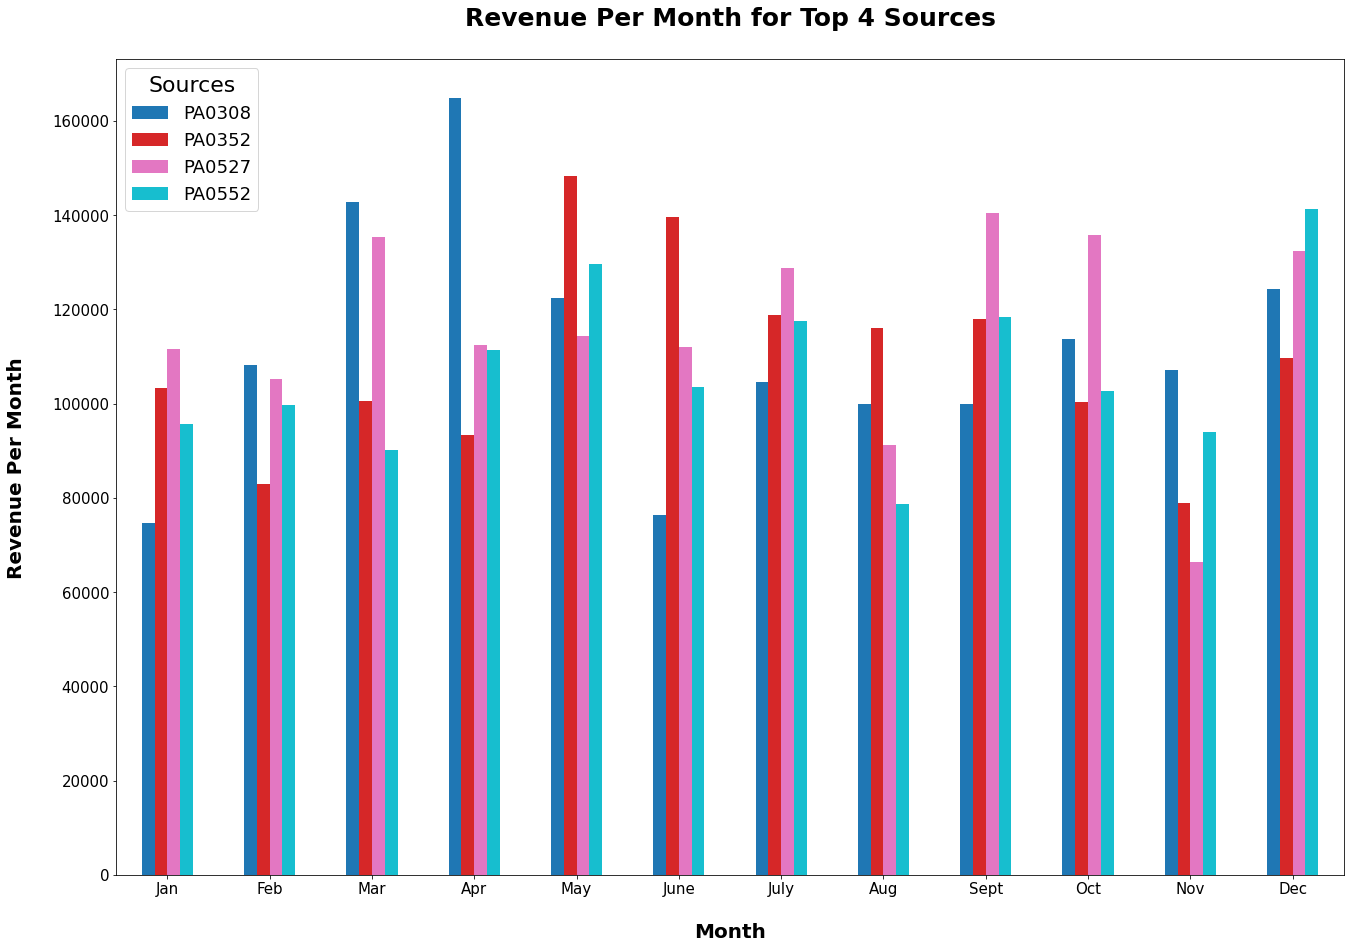

In [57]:
#create a pivot table that will easily summarize the data

top4tbl = pd.pivot_table(top4rev, values='revenue', index=['month'], 
                         columns=['source_id'], fill_value=0, aggfunc=np.sum)

labels= ['Jan', 'Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec' ]
top4tbl.index = labels

top4tbl.plot(kind='bar', figsize=(22, 15), cmap='tab10')


plt.xlabel('\nMonth',fontsize=20, fontweight="bold")

plt.ylabel('Revenue Per Month\n',fontsize=20, fontweight="bold")
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15)
plt.title('Revenue Per Month for Top 4 Sources\n',fontsize=25,fontweight="bold")
plt.legend(fontsize='18', loc = 'upper left', title='Sources', title_fontsize='22')
plt.show()
